# Data Wrangling

Reference article https://www.springboard.com/blog/data-wrangling/

All the activity that you do on the raw data to make it “clean” enough to input to your analytical algorithm is called data wrangling or data munging. If you want to create an efficient [ETL](https://en.wikipedia.org/wiki/Extract,_transform,_load) pipeline (**extract, transform and load**) or create beautiful data visualizations, you should be prepared to do a lot of data wrangling.

As most statisticians, data analysts and data scientists will admit,most of the time spent implementing an analysis is devoted to cleaning or wrangling the data itself, rather than to coding or running a particular model that uses the data. According to O’Reilly’s 2016 Data Science Salary Survey, 69% of data scientists will spend a significant amount of time in their day-to-day dealing with basic exploratory data analysis, while 53% spend time cleaning their data. Data wrangling is an essential part of the data science role — and if you gain data wrangling skills and become proficient at it, you’ll quickly be recognized as somebody who can contribute to cutting-edge data science work and who can hold their own as a data professional.

## Data wrangling with Pandas

In [95]:
import pandas as pd

df = pd.read_csv('../data/titanic-train.csv')

df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Dropping missing or null values in the dataset.

In [96]:
pd.isnull(df).any()

survived    False
pclass      False
name        False
sex         False
age          True
sibsp       False
parch       False
ticket      False
fare        False
cabin        True
embarked     True
dtype: bool

‘Age’, ‘Cabin’ and ‘Embarked’ contain missing or null values
We’d like to drop all the rows with missing values.

In [97]:
df_nona = df.dropna()
df_nona.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S


## Filtering Data

In [98]:
df[df.age > 30].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S


In [99]:
df[df.sex == 'female'].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [100]:
df[(df.age > 30) & (df.sex=='female')].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.0000,NaN,S
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31,1,0,345763,18.0000,NaN,S


In [101]:
female_over_30 = df[(df.age > 30) & (df.sex=='female')]
female_over_30.describe()

,survived,pclass,age,sibsp,parch,fare
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,0.805825,1.737864,41.893204,0.504854,0.708738,61.347290
std,0.397498,0.803926,8.528686,0.575203,1.288190,70.120968
min,0.000000,1.000000,30.500000,0.000000,0.000000,7.750000
25%,1.000000,1.000000,35.000000,0.000000,0.000000,16.700000
50%,1.000000,2.000000,40.000000,0.000000,0.000000,31.387500
75%,1.000000,2.000000,48.000000,1.000000,1.000000,79.825000
max,1.000000,3.000000,63.000000,3.000000,6.000000,512.329200


## Grouping Data

We want to understand if the gender of the person had any correlation with the survival of the person?

In [102]:
df.groupby('sex').survived.value_counts()

sex      
female  1    233
        0     81
male    0    468
        1    109
dtype: int64

## Exporting data

In [103]:
#! pip install openpyxl
# female_over_30.to_excel('../data/titanic_female_over_30.xlsx')

## Time series data handling

Is one of the most important forms of data you will find while working with financial data, weather data etc.
You’ll want to look at certain periods of time to see climate patterns or the differences between financial growth and stagnation

In [104]:
from datetime import datetime
import matplotlib as matplotlib
%matplotlib inline
import matplotlib.pyplot as pyplot
import numpy as np

In [105]:
# create an array of 200 elements at the interval of 1 sec
data = pd.date_range('1/1/2016', periods=150, freq='s')
data[:10]

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:00:01',
               '2016-01-01 00:00:02', '2016-01-01 00:00:03',
               '2016-01-01 00:00:04', '2016-01-01 00:00:05',
               '2016-01-01 00:00:06', '2016-01-01 00:00:07',
               '2016-01-01 00:00:08', '2016-01-01 00:00:09'],
              dtype='datetime64[ns]', freq='S', tz=None)

In [106]:
time_series = pd.Series(np.random.randint(0, 500, len(data)), index=data)
time_series.head()

2016-01-01 00:00:00     19
2016-01-01 00:00:01     32
2016-01-01 00:00:02     78
2016-01-01 00:00:03    496
2016-01-01 00:00:04    268
Freq: S, dtype: int64

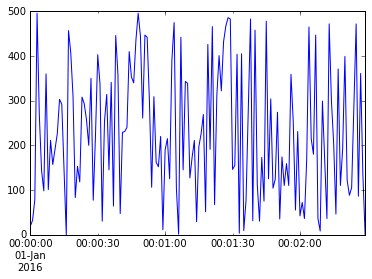

In [107]:
time_series.plot()

In [108]:
# Resample: bin 1 sec raws to minutes and  summing the corresponding values.
time_series = time_series
time_series = time_series.resample('1Min', how='sum')

In [109]:
time_series.head()

2016-01-01 00:00:00    14685
2016-01-01 00:01:00    13840
2016-01-01 00:02:00     5928
Freq: T, dtype: int64

In [110]:
# time zone conversion: let's assume origina timeseries was in UTC and we want to convert US/Estern
time_series_utc = time_series.tz_localize('UTC')

time_series_utc.tz_convert('US/Eastern')

2015-12-31 19:00:00-05:00    14685
2015-12-31 19:01:00-05:00    13840
2015-12-31 19:02:00-05:00     5928
Freq: T, dtype: int64

In [111]:
time_series

2016-01-01 00:00:00    14685
2016-01-01 00:01:00    13840
2016-01-01 00:02:00     5928
Freq: T, dtype: int64